# Imports

In [19]:
import os

from SignLanguageTranslator.utils import visualization      as vis
from SignLanguageTranslator.utils import videoPreprocessing as vpp
from SignLanguageTranslator.utils import dataLoader         as dl



from importlib import reload
# reload(vpp)

# math
import numpy as np
# import torch

# Image processing
# import cv2
import PIL
from PIL.Image import fromarray as np2pil

# visualization
import matplotlib.pyplot as plt
# import seaborn as sns
import moviepy.editor as mpy
from moviepy.video.io.bindings import mplfig_to_npimage
from moviepy.video.VideoClip import DataVideoClip

# directory
import os
from glob import glob

# notebook
from tqdm.auto import tqdm
from IPython.display import clear_output, Image, Video

In [23]:
reload(dl)

<module 'SignLanguageTranslator.utils.dataLoader' from '/Users/mudassariqbal/Envs/fyp/SignLanguageTranslator/SignLanguageTranslator/utils/dataLoader.py'>

In [24]:
dl.create_file_path('d-D', 'mp4')

'/Users/mudassariqbal/Envs/fyp/SignLanguageTranslator/SignLanguageTranslator/datasets/Signs_recordings/Videos/HFAD_Book1/person101/d-D_person101_front.mp4'

In [10]:
dl.create_file_path("","")

/Users/mudassariqbal/Envs/fyp/SignLanguageTranslator/SignLanguageTranslator/utils/dataLoader.py


'data/'

# Plot Landmarks

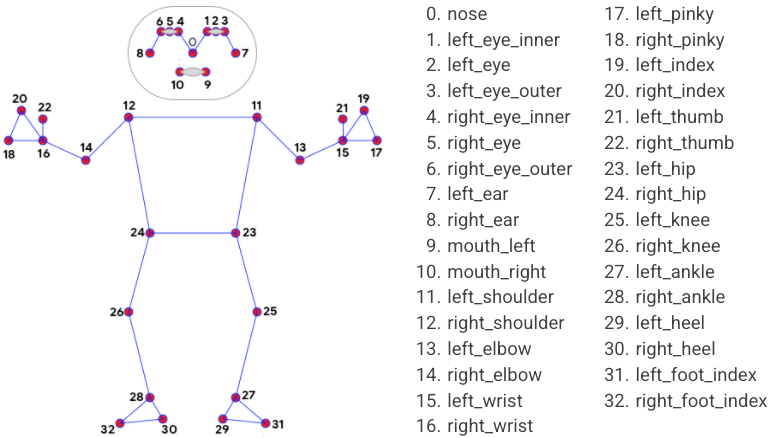

In [10]:
Image('data/mediapipe_pose_tracking_full_body_landmarks.png')

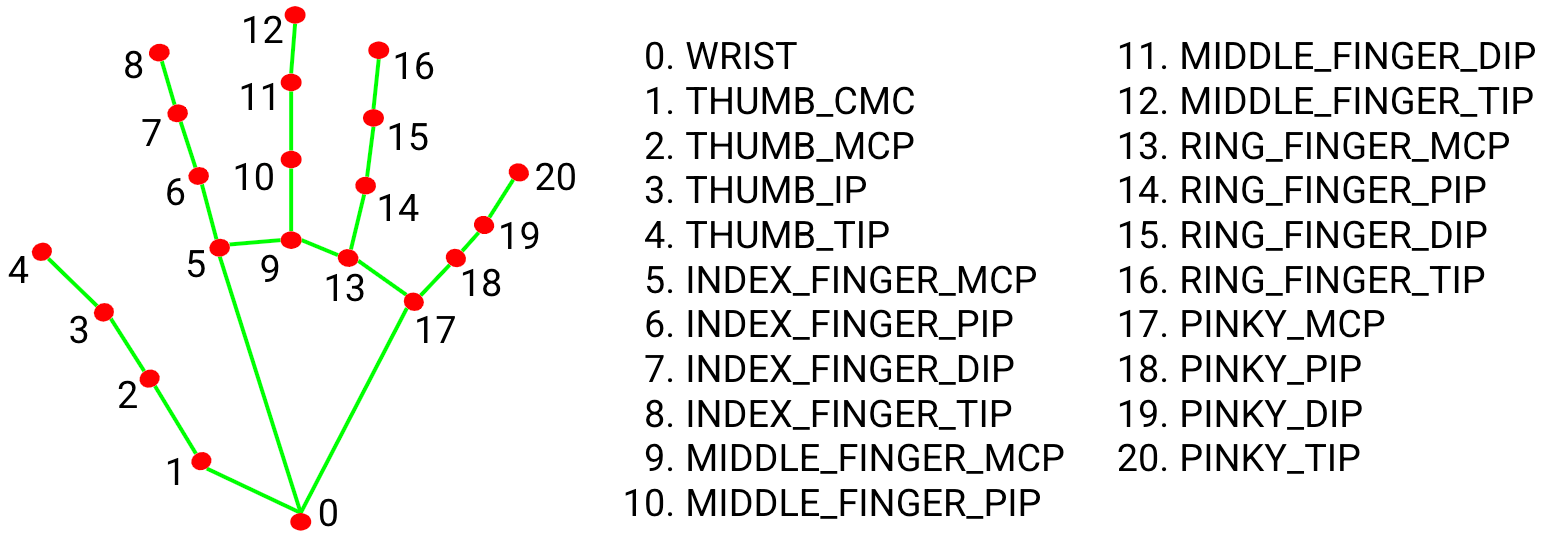

In [11]:
Image('data/mediapipe_hand_landmarks.png')

# Experiments

Load data

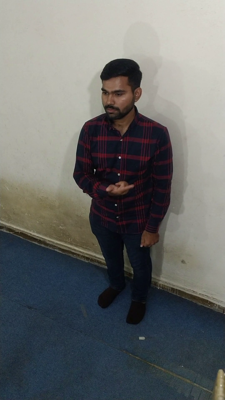

In [54]:
# clip = mpy.VideoFileClip('inputs/d-D_person205_front.mp4')
clip = mpy.VideoFileClip('inputs/emergency_person201_left.mp4')
image = clip.get_frame(3)
clip.close()

np2pil(image).resize((225, 400))

Process

In [67]:
reload(vpp)

<module 'SignLanguageTranslator.utils.videoPreprocessing' from '/Users/mudassariqbal/Envs/fyp/SignLanguageTranslator/SignLanguageTranslator/utils/videoPreprocessing.py'>

['inputs/ورزش_person201_left.mp4',
 'inputs/بسکٹ_person201_below.mp4',
 'inputs/d-D_person205_front.mp4',
 'inputs/گجرات_person201_front.mp4',
 'inputs/شہر_person255_front.mp4',
 'inputs/ڈاکٹر_person201_left.mp4',
 'inputs/افسوس_person201_left.mp4',
 'inputs/کرسی_person201_front.mp4',
 'inputs/امریکہ_person255_below.mp4',
 'inputs/بس_person255_right.mp4',
 'inputs/گلابی_person201_below.mp4',
 'inputs/چکے_person201_right.mp4',
 'inputs/بطخ_person255_left.mp4',
 'inputs/emergency_person201_left.mp4',
 'inputs/صلح_person255_front.mp4',
 'inputs/کیمرہ_person201_right.mp4']

In [80]:
def count_success(videopath, flip=False):
    n_detections=0
    n_frames=0
    clip = mpy.VideoFileClip(videopath)
    for frame in clip.iter_frames():
        n_frames+=1
        out=vpp.hands.process(frame if not flip else frame[:,::-1].copy())
        if out.multi_handedness:
            n_detections+=len(out.multi_handedness)
    clip.close()
    return n_frames, n_detections/2

In [81]:
ps = glob('inputs/*.mp4')
sc = [count_success(p) for p in tqdm(ps)]
scf = [count_success(p, flip=True) for p in tqdm(ps)]
np.mean([v[0][1]>v[1][1] for v in zip(sc,scf)]), \
    np.mean([v[0][1]/v[0][0] for v in zip(sc,scf)]), \
        np.mean([v[1][1]/v[1][0] for v in zip(sc,scf)])

100%|██████████| 16/16 [01:13<00:00,  4.58s/it]


(0.4375, 0.7610047536101735, 0.7578819966012131)

In [76]:
# front = (0.4, 0.8459190911800445, 0.8621475342183095)
# 
# 
# 
# *     = (0.4375, 0.7610047536101735, 0.7578819966012131)

0.4375

In [ ]:
# flip (67, 51.5)
# no flip (67, 50.0)
# no flip (115, 88.0)
# flip (115, 85.5)

In [45]:
out = vpp.hands.process(image[:,::-1].copy())
out.multi_handedness

[classification {
   index: 1
   score: 0.9520449638366699
   label: "Right"
 },
 classification {
   index: 0
   score: 0.9897491931915283
   label: "Left"
 }]

In [ ]:
np2pil(image[:,::-1].copy())

In [46]:
right = vpp.mplandmark_to_nparray(out.multi_hand_world_landmarks[0], False)
left  = vpp.mplandmark_to_nparray(out.multi_hand_world_landmarks[1], False)

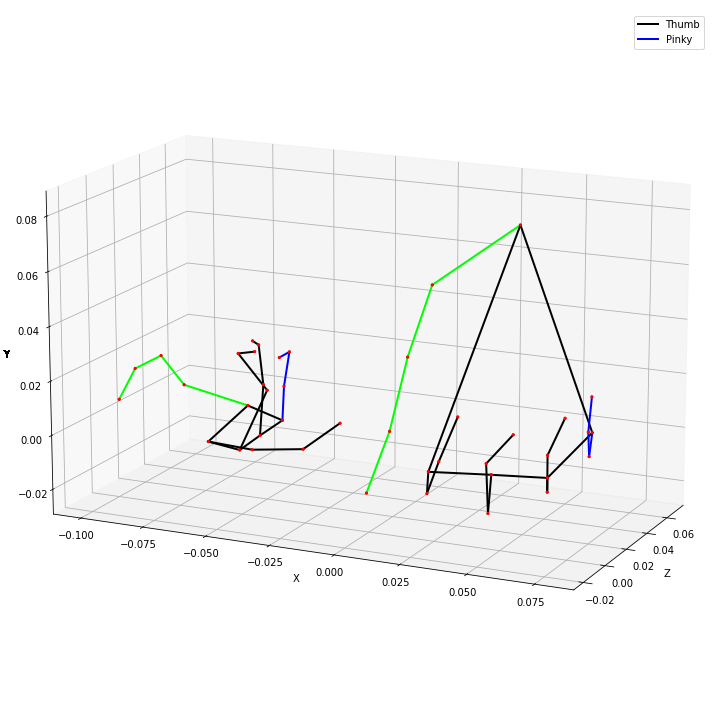

In [52]:
both = np.concatenate([left, right], axis=0)
both[...,:2] *= -1

np2pil(np.concatenate([vis.landmarks_to_image(both)],axis=1))

In [200]:
out2 = vpp.pose.process(image)


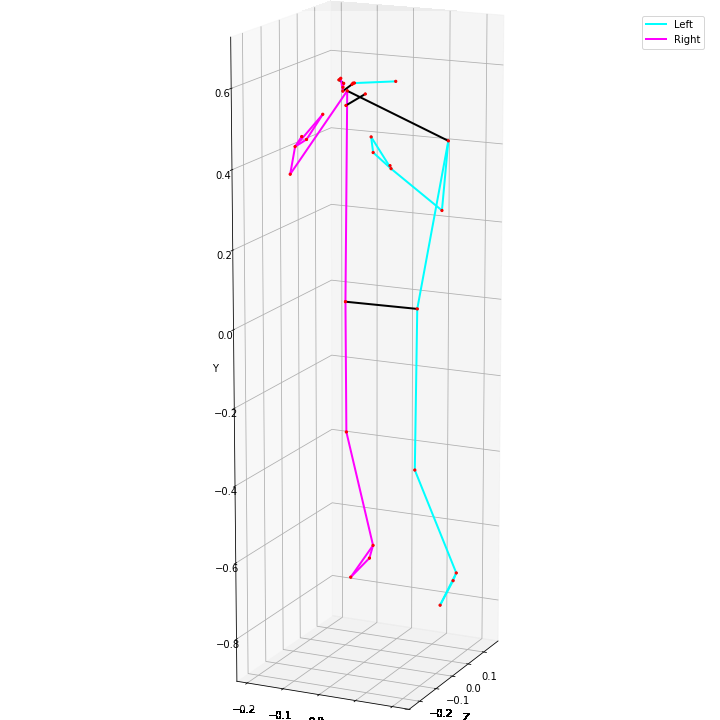

In [201]:
pose = vpp.mplandmark_to_nparray(out2.pose_world_landmarks,False)
pose[...,1] *= -1
# both[...,2] *= -1
np2pil(vis.landmarks_to_image(pose))

In [27]:
print('''"Exception in worker process", "pathname": "/usr/local/lib/python3.8/site-packages/gunicorn/glogging.py", "funcName": "exception", "lineno": 268, "exc_info": "Traceback (most recent call last):\n  File \"/app/rate_table_parser/rate_parser.py\", line 4, in <module>\n    from whopper_app.matcher.attribute_matcher import AttributeMatcher\nModuleNotFoundError: No module named 'whopper_app'\n\nDuring handling of the above exception, another exception occurred:\n\nTraceback (most recent call last):\n  File \"/usr/local/lib/python3.8/site-packages/whopper/scan_package.py\", line 95, in _require\n    return importlib.import_module(module_name)\n  File \"/usr/local/lib/python3.8/importlib/__init__.py\", line 127, in import_module\n    return _bootstrap._gcd_import(name[level:], package, level)\n  File \"<frozen importlib._bootstrap>\", line 1014, in _gcd_import\n  File \"<frozen importlib._bootstrap>\", line 991, in _find_and_load\n  File \"<frozen importlib._bootstrap>\", line 975, in _find_and_load_unlocked\n  File \"<frozen importlib._bootstrap>\", line 671, in _load_unlocked\n  File \"<frozen importlib._bootstrap_external>\", line 843, in exec_module\n  File \"<frozen importlib._bootstrap>\", line 219, in _call_with_frames_removed\n  File \"/app/rate_table_parser/app.py\", line 2, in <module>\n    from rate_table_parser import (\n  File \"/app/rate_table_parser/rate_parser.py\", line 19, in <module>\n    from utils.preprocess import Preprocess\nModuleNotFoundError: No module named 'utils'\n\nThe above exception was the direct cause of the following exception:\n\nTraceback (most recent call last):\n  File \"/usr/local/lib/python3.8/site-packages/gunicorn/arbiter.py\", line 583, in spawn_worker\n    worker.init_process()\n  File \"/usr/local/lib/python3.8/site-packages/gunicorn/workers/gthread.py\", line 92, in init_process\n    super().init_process()\n  File \"/usr/local/lib/python3.8/site-packages/gunicorn/workers/base.py\", line 119, in init_process\n    self.load_wsgi()\n  File \"/usr/local/lib/python3.8/site-packages/gunicorn/workers/base.py\", line 144, in load_wsgi\n    self.wsgi = self.app.wsgi()\n  File \"/usr/local/lib/python3.8/site-packages/gunicorn/app/base.py\", line 67, in wsgi\n    self.callable = self.load()\n  File \"/usr/local/lib/python3.8/site-packages/gunicorn/app/wsgiapp.py\", line 49, in load\n    return self.load_wsgiapp()\n  File \"/usr/local/lib/python3.8/site-packages/whopper/cli/commands/gunicorn.py\", line 68, in load_wsgiapp\n    model_cls_list = scan_models(glob)\n  File \"/usr/local/lib/python3.8/site-packages/whopper/scan_package.py\", line 40, in scan_models\n    imported_pymodules = [_require(module_name)\n  File \"/usr/local/lib/python3.8/site-packages/whopper/scan_package.py\", line 40, in <listcomp>\n    imported_pymodules = [_require(module_name)\n  File \"/usr/local/lib/python3.8/site-packages/whopper/scan_package.py\", line 97, in _require\n    raise Exception(f'Failed to scan module {module_name}') from e\nException: Failed to scan module rate_table_parser.app"}
{"name": "gunicorn.error", "levelname": "INFO", "msg": "Worker exiting (pid: %s)", "pathname": "/usr/local/lib/python3.8/site-packages/gunicorn/glogging.py", "funcName": "info", "lineno": 262, "exc_info": null}
{"name": "gunicorn.error", "levelname": "ERROR", "msg": "Exception in worker process", "pathname": "/usr/local/lib/python3.8/site-packages/gunicorn/glogging.py", "funcName": "exception", "lineno": 268, "exc_info": "Traceback (most recent call last):\n  File \"/app/rate_table_parser/rate_parser.py\", line 4, in <module>\n    from whopper_app.matcher.attribute_matcher import AttributeMatcher\nModuleNotFoundError: No module named 'whopper_app'\n\nDuring handling of the above exception, another exception occurred:\n\nTraceback (most recent call last):\n  File \"/usr/local/lib/python3.8/site-packages/whopper/scan_package.py\", line 95, in _require\n    return importlib.import_module(module_name)\n  File \"/usr/local/lib/python3.8/importlib/__init__.py\", line 127, in import_module\n    return _bootstrap._gcd_import(name[level:], package, level)\n  File \"<frozen importlib._bootstrap>\", line 1014, in _gcd_import\n  File \"<frozen importlib._bootstrap>\", line 991, in _find_and_load\n  File \"<frozen importlib._bootstrap>\", line 975, in _find_and_load_unlocked\n  File \"<frozen importlib._bootstrap>\", line 671, in _load_unlocked\n  File \"<frozen importlib._bootstrap_external>\", line 843, in exec_module\n  File \"<frozen importlib._bootstrap>\", line 219, in _call_with_frames_removed\n  File \"/app/rate_table_parser/app.py\", line 2, in <module>\n    from rate_table_parser import (\n  File \"/app/rate_table_parser/rate_parser.py\", line 19, in <module>\n    from utils.preprocess import Preprocess\nModuleNotFoundError: No module named 'utils'\n\nThe above exception was the direct cause of the following exception:\n\nTraceback (most recent call last):\n  File \"/usr/local/lib/python3.8/site-packages/gunicorn/arbiter.py\", line 583, in spawn_worker\n    worker.init_process()\n  File \"/usr/local/lib/python3.8/site-packages/gunicorn/workers/gthread.py\", line 92, in init_process\n    super().init_process()\n  File \"/usr/local/lib/python3.8/site-packages/gunicorn/workers/base.py\", line 119, in init_process\n    self.load_wsgi()\n  File \"/usr/local/lib/python3.8/site-packages/gunicorn/workers/base.py\", line 144, in load_wsgi\n    self.wsgi = self.app.wsgi()\n  File \"/usr/local/lib/python3.8/site-packages/gunicorn/app/base.py\", line 67, in wsgi\n    self.callable = self.load()\n  File \"/usr/local/lib/python3.8/site-packages/gunicorn/app/wsgiapp.py\", line 49, in load\n    return self.load_wsgiapp()\n  File \"/usr/local/lib/python3.8/site-packages/whopper/cli/commands/gunicorn.py\", line 68, in load_wsgiapp\n    model_cls_list = scan_models(glob)\n  File \"/usr/local/lib/python3.8/site-packages/whopper/scan_package.py\", line 40, in scan_models\n    imported_pymodules = [_require(module_name)\n  File \"/usr/local/lib/python3.8/site-packages/whopper/scan_package.py\", line 40, in <listcomp>\n    imported_pymodules = [_require(module_name)\n  File \"/usr/local/lib/python3.8/site-packages/whopper/scan_package.py\", line 97, in _require\n    raise Exception(f'Failed to scan module {module_name}') from e\nException: Failed to scan module rate_table_parser.app"}
{"name": "gunicorn.error", "levelname": "INFO", "msg": "Worker exiting (pid: %s)", "pathname": "/usr/local/lib/python3.8/site-packages/gunicorn/glogging.py", "funcName": "info", "lineno": 262, "exc_info": null}''')

"Exception in worker process", "pathname": "/usr/local/lib/python3.8/site-packages/gunicorn/glogging.py", "funcName": "exception", "lineno": 268, "exc_info": "Traceback (most recent call last):
  File "/app/rate_table_parser/rate_parser.py", line 4, in <module>
    from whopper_app.matcher.attribute_matcher import AttributeMatcher
ModuleNotFoundError: No module named 'whopper_app'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/whopper/scan_package.py", line 95, in _require
    return importlib.import_module(module_name)
  File "/usr/local/lib/python3.8/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1014, in _gcd_import
  File "<frozen importlib._bootstrap>", line 991, in _find_and_load
  File "<frozen importlib._bootstrap>", line 975, in _find_and_load_unlocked
  File "<f